# Petrol Prices in Pakistan

![](images/cover_photo.png)

# 1. Importing Libraries

In [833]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# 2. Loading Dataset

In [834]:
df = pd.read_csv('petrol_prices_pakistan_2010_2025.csv')
df.tail()

,Date,Petrol Price (PKR per litre)
180,2025-01,281.3
181,2025-02,284.5
182,2025-03,287.2
183,2025-04,289.1
184,2025-05,292.0


# 3. Exploring Data

In [835]:
print('Dataset shape:', df.shape)

Dataset shape: (185, 2)


In [836]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          185 non-null    object 
 1   Petrol Price (PKR per litre)  185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [837]:
duplicate_values = df.duplicated().sum()
print("Duplicate Values:", duplicate_values)

Duplicate Values: 0


# 4. Visualization

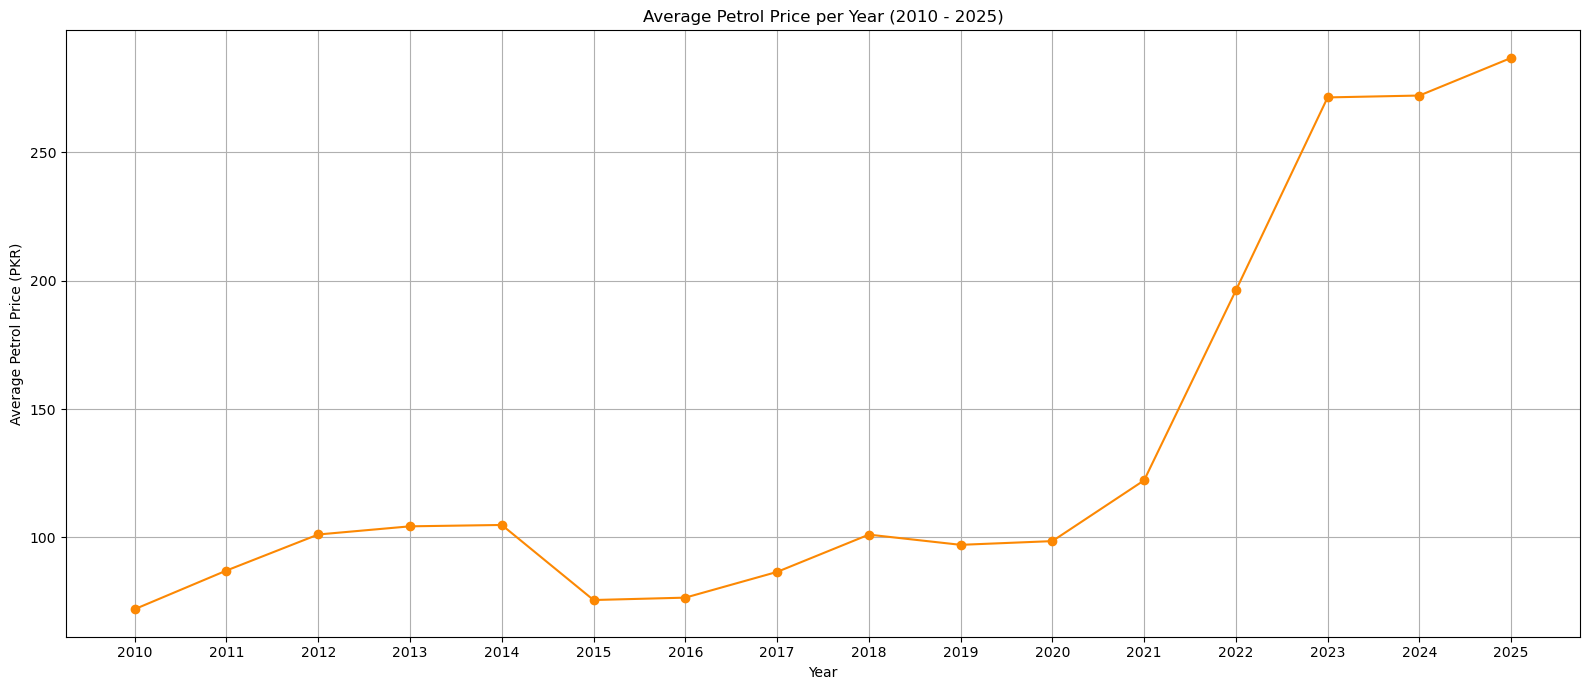

In [838]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Extract Year
df['Year'] = df['Date'].dt.year

# Group by Year and calculate average petrol price
yearly_avg = df.groupby('Year')['Petrol Price (PKR per litre)'].mean().reset_index()

# Plotting
plt.figure(figsize=(16, 7))
plt.plot(yearly_avg['Year'], yearly_avg['Petrol Price (PKR per litre)'], marker='o', linestyle='-', color='#fc8803')

plt.title('Average Petrol Price per Year (2010 - 2025)')
plt.xlabel('Year')
plt.ylabel('Average Petrol Price (PKR)')
plt.grid(True)
plt.xticks(yearly_avg['Year'])  # Ensure all years show on x-axis
plt.tight_layout()
plt.savefig('average_petrol_price_per_year.png', dpi=300, bbox_inches='tight')
plt.show()

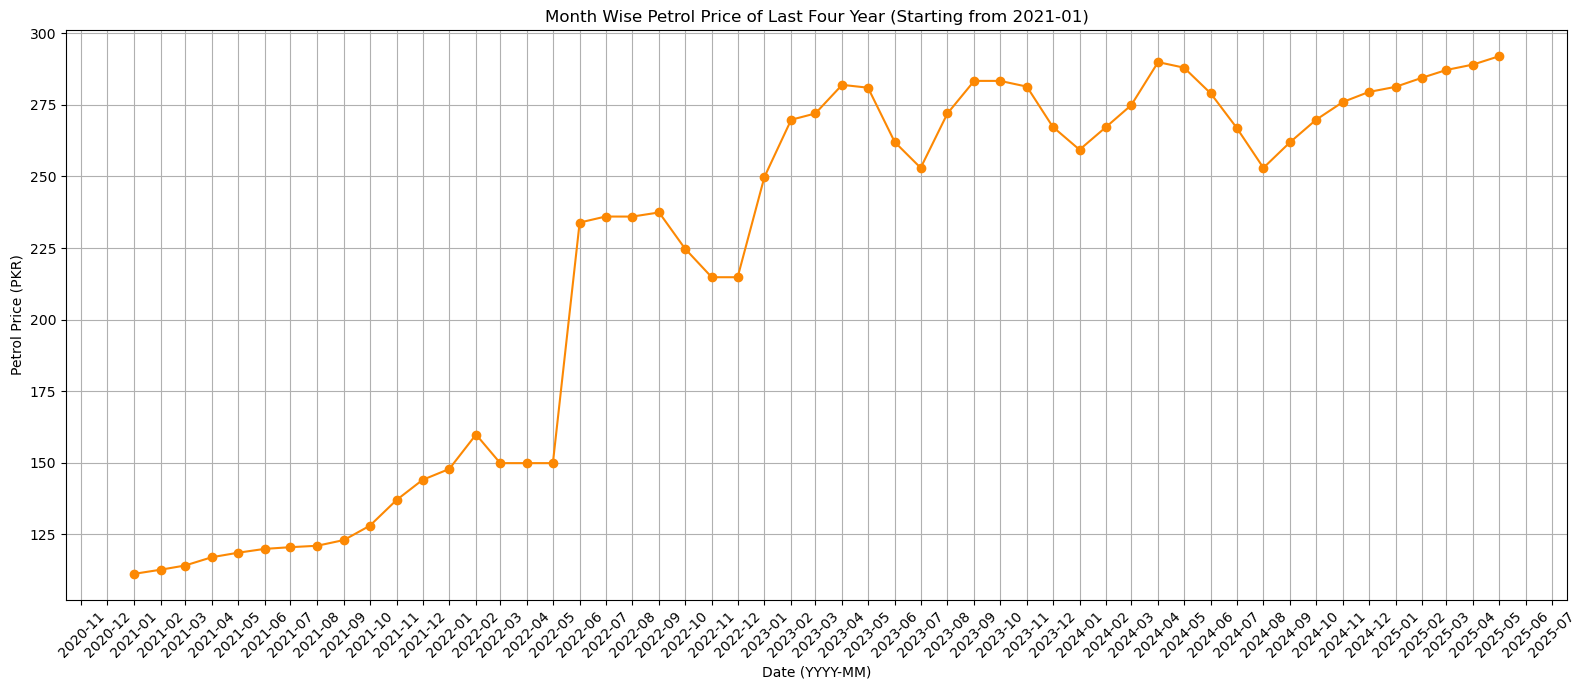

In [839]:
# Filter data to start from 2022-01
start_date = pd.to_datetime('2021-01')
df_filtered = df[df['Date'] >= start_date]

# Plotting the graph
plt.figure(figsize=(16, 7))
plt.plot(df_filtered['Date'], df_filtered['Petrol Price (PKR per litre)'], marker='o', linestyle='-', color='#fc8803')

# Format x-axis for monthly ticks
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())  # show every month

# Formatting the plot
plt.title('Month Wise Petrol Price of Last Four Year (Starting from 2021-01)')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Petrol Price (PKR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Month Wise Petrol Price.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [840]:
# Create a new column for year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [841]:
df.head()

,Date,Petrol Price (PKR per litre),Year,Month
0,2010-01-01,66.36,2010,1
1,2010-02-01,66.36,2010,2
2,2010-03-01,69.03,2010,3
3,2010-04-01,71.21,2010,4
4,2010-05-01,72.96,2010,5


# 5. Model Training

In [842]:
X = df.drop(['Date', 'Petrol Price (PKR per litre)'], axis=1)
y = df['Petrol Price (PKR per litre)']

In [843]:
X.head()

,Year,Month
0,2010,1
1,2010,2
2,2010,3
3,2010,4
4,2010,5


In [844]:
# Splitting the data
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [845]:
# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(),
    "KNN": KNeighborsRegressor()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = r2_score(y_test, predictions)
    results[name] = score

# Create a DataFrame from the results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R2 Score'])
results_df = results_df.sort_values(by='R2 Score', ascending=False)

print("Models Performance:\n")
print(results_df)


Models Performance:

                   R2 Score
Gradient Boosting  0.989774
Random Forest      0.987233
XGBoost            0.955019
KNN                0.951160
Lasso Regression   0.530412
Ridge Regression   0.530384
Linear Regression  0.530332


# 6. Future Prediction

In [846]:
future_input = pd.DataFrame({'Year': [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035], 
                             'Month': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]})
future_input

,Year,Month
0,2026,1
1,2027,1
2,2028,1
3,2029,1
4,2030,1
5,2031,1
6,2032,1
7,2033,1
8,2034,1
9,2035,1


### Prediction Using Gradient Boosting

In [847]:
# Using best model which higher r2 score
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train, y_train)  # Make sure it's trained

# Predict on future input
future_predictions = best_model.predict(future_input)

# Combine input and predictions for display
result_df = future_input.copy()
result_df['Predicted Price'] = future_predictions

print(result_df)

   Year  Month  Predicted Price
0  2026      1       280.300452
1  2027      1       280.300452
2  2028      1       280.300452
3  2029      1       280.300452
4  2030      1       280.300452
5  2031      1       280.300452
6  2032      1       280.300452
7  2033      1       280.300452
8  2034      1       280.300452
9  2035      1       280.300452


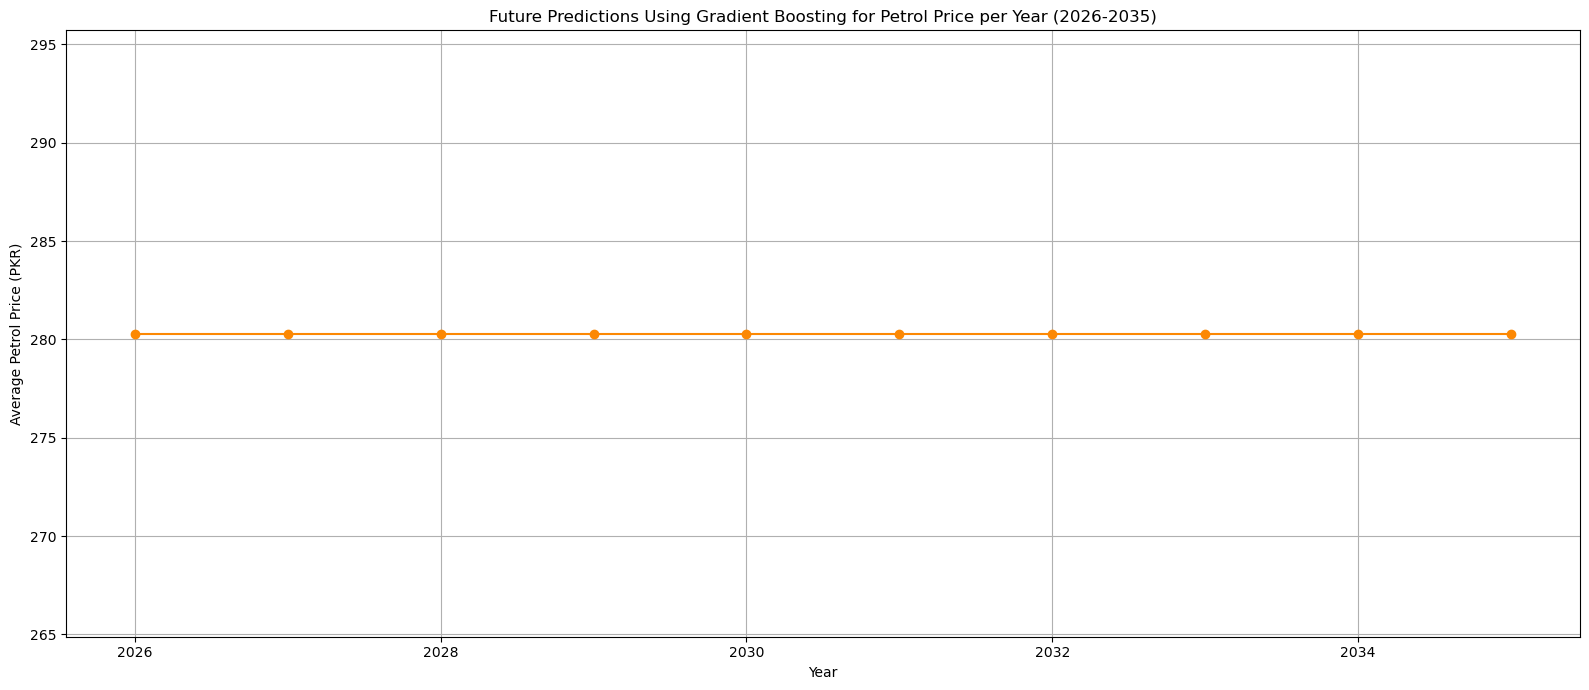

In [848]:
# Plotting
plt.figure(figsize=(16, 7))
plt.plot(result_df['Year'], result_df['Predicted Price'], marker='o', linestyle='-', color='#fc8803')

plt.title('Future Predictions Using Gradient Boosting for Petrol Price per Year (2026-2035)')
plt.xlabel('Year')
plt.ylabel('Average Petrol Price (PKR)')
plt.grid(True)
plt.tight_layout()

plt.show()

### Prediction Using Random Forest

In [849]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)  # Make sure it's trained

# Predict on future input
future_predictions = best_model.predict(future_input)

# Combine input and predictions for display
result_df = future_input.copy()
result_df['Predicted Price'] = future_predictions

print(result_df)

   Year  Month  Predicted Price
0  2026      1         280.7062
1  2027      1         280.7062
2  2028      1         280.7062
3  2029      1         280.7062
4  2030      1         280.7062
5  2031      1         280.7062
6  2032      1         280.7062
7  2033      1         280.7062
8  2034      1         280.7062
9  2035      1         280.7062


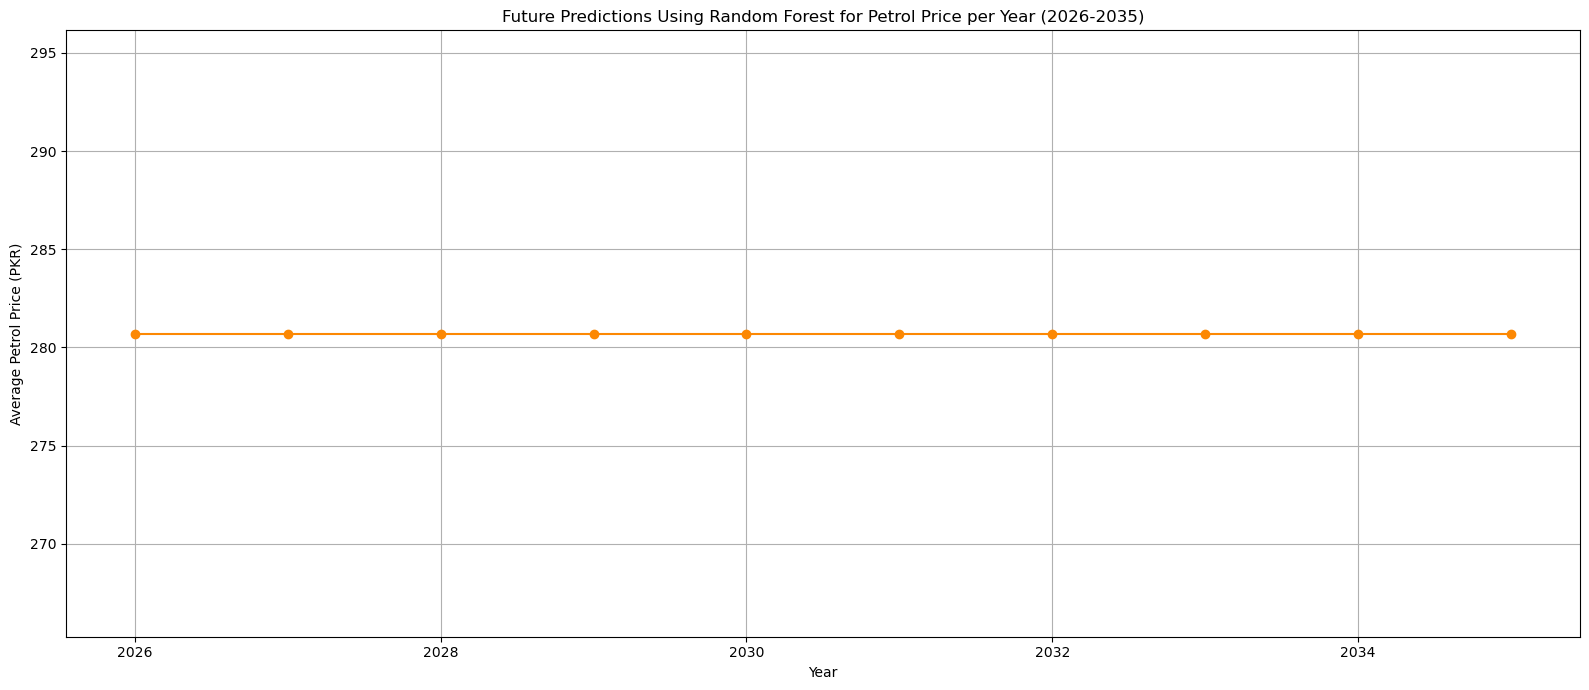

In [850]:
# Plotting
plt.figure(figsize=(16, 7))
plt.plot(result_df['Year'], result_df['Predicted Price'], marker='o', linestyle='-', color='#fc8803')

plt.title('Future Predictions Using Random Forest for Petrol Price per Year (2026-2035)')
plt.xlabel('Year')
plt.ylabel('Average Petrol Price (PKR)')
plt.grid(True)
plt.tight_layout()

plt.show()

### Prediction Using XGBoost

In [851]:
best_model = xgb.XGBRegressor()
best_model.fit(X_train, y_train)  # Make sure it's trained

# Predict on future input
future_predictions = best_model.predict(future_input)

# Combine input and predictions for display
result_df = future_input.copy()
result_df['Predicted Price'] = future_predictions

print(result_df)

   Year  Month  Predicted Price
0  2026      1       281.300934
1  2027      1       281.300934
2  2028      1       281.300934
3  2029      1       281.300934
4  2030      1       281.300934
5  2031      1       281.300934
6  2032      1       281.300934
7  2033      1       281.300934
8  2034      1       281.300934
9  2035      1       281.300934


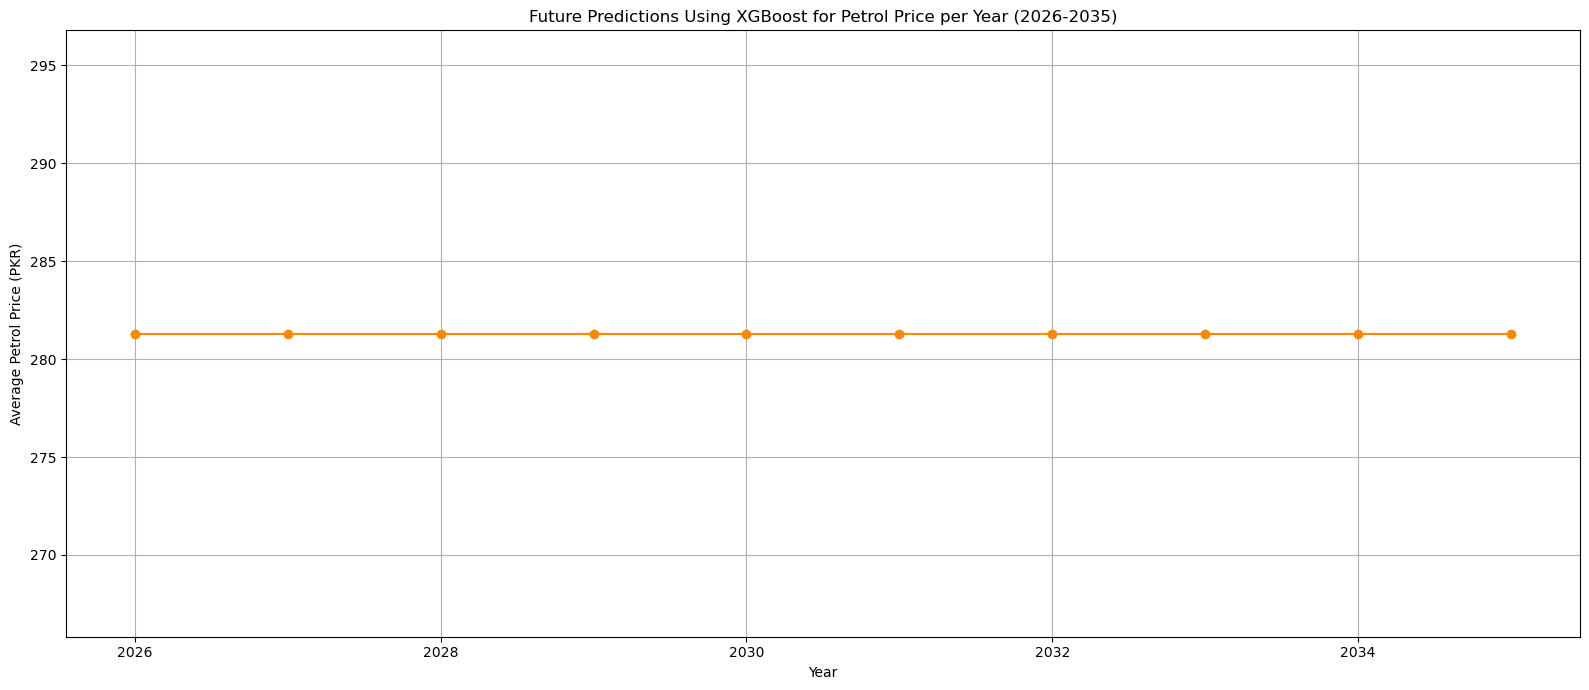

In [852]:
# Plotting
plt.figure(figsize=(16, 7))
plt.plot(result_df['Year'], result_df['Predicted Price'], marker='o', linestyle='-', color='#fc8803')

plt.title('Future Predictions Using XGBoost for Petrol Price per Year (2026-2035)')
plt.xlabel('Year')
plt.ylabel('Average Petrol Price (PKR)')
plt.grid(True)
plt.tight_layout()

plt.show()

### Prediction Using KNN

In [853]:
best_model = KNeighborsRegressor()
best_model.fit(X_train, y_train)  # Make sure it's trained

# Predict on future input
future_predictions = best_model.predict(future_input)

# Combine input and predictions for display
result_df = future_input.copy()
result_df['Predicted Price'] = future_predictions

print(result_df)

   Year  Month  Predicted Price
0  2026      1          275.936
1  2027      1          275.936
2  2028      1          275.936
3  2029      1          280.288
4  2030      1          280.288
5  2031      1          280.288
6  2032      1          280.288
7  2033      1          286.820
8  2034      1          286.820
9  2035      1          286.820


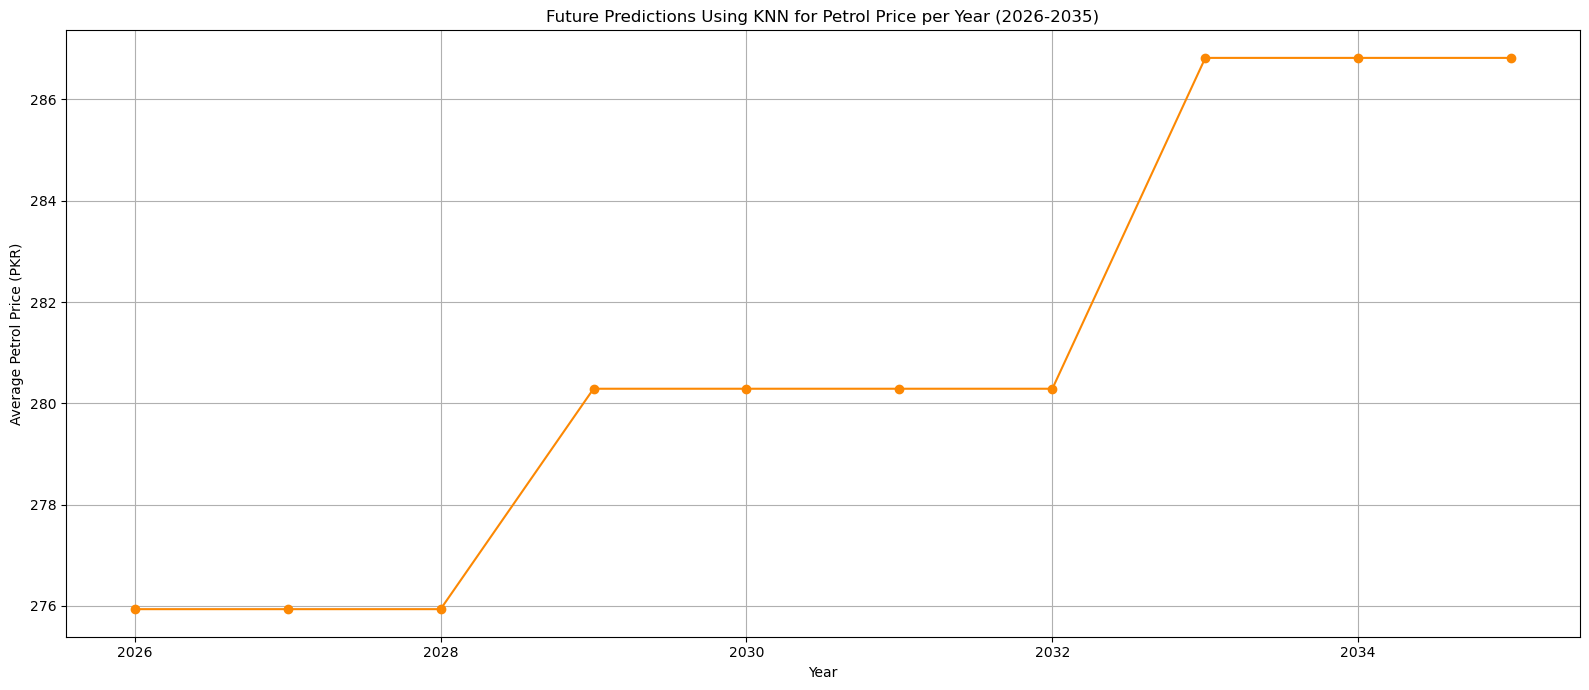

In [854]:
# Plotting
plt.figure(figsize=(16, 7))
plt.plot(result_df['Year'], result_df['Predicted Price'], marker='o', linestyle='-', color='#fc8803')

plt.title('Future Predictions Using KNN for Petrol Price per Year (2026-2035)')
plt.xlabel('Year')
plt.ylabel('Average Petrol Price (PKR)')
plt.grid(True)
plt.tight_layout()

plt.show()

### Prediction Using Lasso Regression

In [855]:
best_model = Lasso()
best_model.fit(X_train, y_train)  # Make sure it's trained

# Predict on future input
future_predictions = best_model.predict(future_input)

# Combine input and predictions for display
result_df = future_input.copy()
result_df['Predicted Price'] = future_predictions

print(result_df)

   Year  Month  Predicted Price
0  2026      1       233.431461
1  2027      1       245.533016
2  2028      1       257.634571
3  2029      1       269.736125
4  2030      1       281.837680
5  2031      1       293.939235
6  2032      1       306.040789
7  2033      1       318.142344
8  2034      1       330.243899
9  2035      1       342.345454


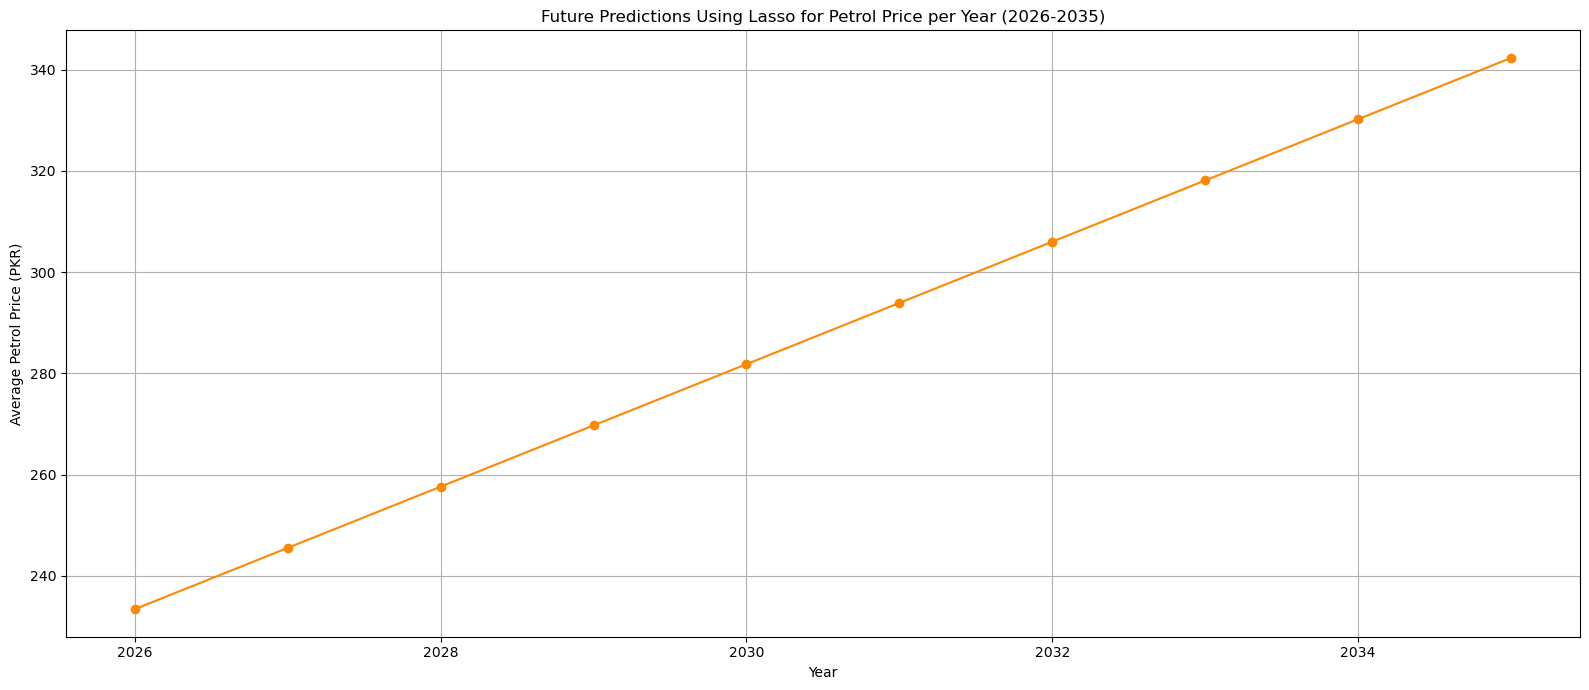

In [856]:
# Plotting
plt.figure(figsize=(16, 7))
plt.plot(result_df['Year'], result_df['Predicted Price'], marker='o', linestyle='-', color='#fc8803')

plt.title('Future Predictions Using Lasso for Petrol Price per Year (2026-2035)')
plt.xlabel('Year')
plt.ylabel('Average Petrol Price (PKR)')
plt.grid(True)
plt.tight_layout()
plt.savefig('future_predictions_lasso.png', dpi=300, bbox_inches='tight')
plt.show()

### Prediction Using Ridge Regression

In [857]:
best_model = Ridge()
best_model.fit(X_train, y_train)  # Make sure it's trained

# Predict on future input
future_predictions = best_model.predict(future_input)

# Combine input and predictions for display
result_df = future_input.copy()
result_df['Predicted Price'] = future_predictions

print(result_df)

   Year  Month  Predicted Price
0  2026      1       233.410770
1  2027      1       245.560348
2  2028      1       257.709926
3  2029      1       269.859504
4  2030      1       282.009082
5  2031      1       294.158660
6  2032      1       306.308238
7  2033      1       318.457816
8  2034      1       330.607394
9  2035      1       342.756972


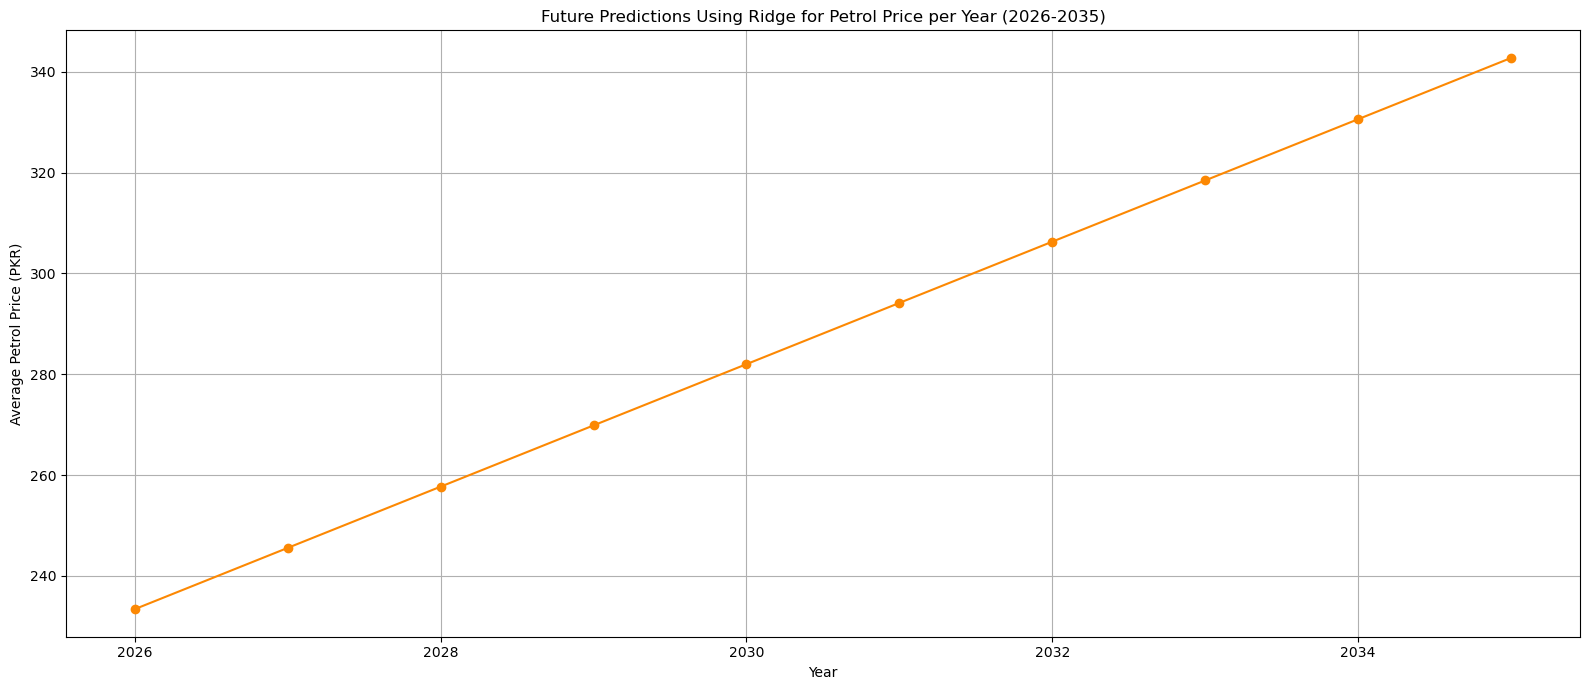

In [858]:
# Plotting
plt.figure(figsize=(16, 7))
plt.plot(result_df['Year'], result_df['Predicted Price'], marker='o', linestyle='-', color='#fc8803')

plt.title('Future Predictions Using Ridge for Petrol Price per Year (2026-2035)')
plt.xlabel('Year')
plt.ylabel('Average Petrol Price (PKR)')
plt.grid(True)
plt.tight_layout()

plt.show()

### Prediction Using Linear Regression

In [859]:
best_model = LinearRegression()
best_model.fit(X_train, y_train)  # Make sure it's trained

# Predict on future input
future_predictions = best_model.predict(future_input)

# Combine input and predictions for display
result_df = future_input.copy()
result_df['Predicted Price'] = future_predictions

print(result_df)

   Year  Month  Predicted Price
0  2026      1       233.444860
1  2027      1       245.598583
2  2028      1       257.752305
3  2029      1       269.906028
4  2030      1       282.059750
5  2031      1       294.213473
6  2032      1       306.367195
7  2033      1       318.520918
8  2034      1       330.674640
9  2035      1       342.828363


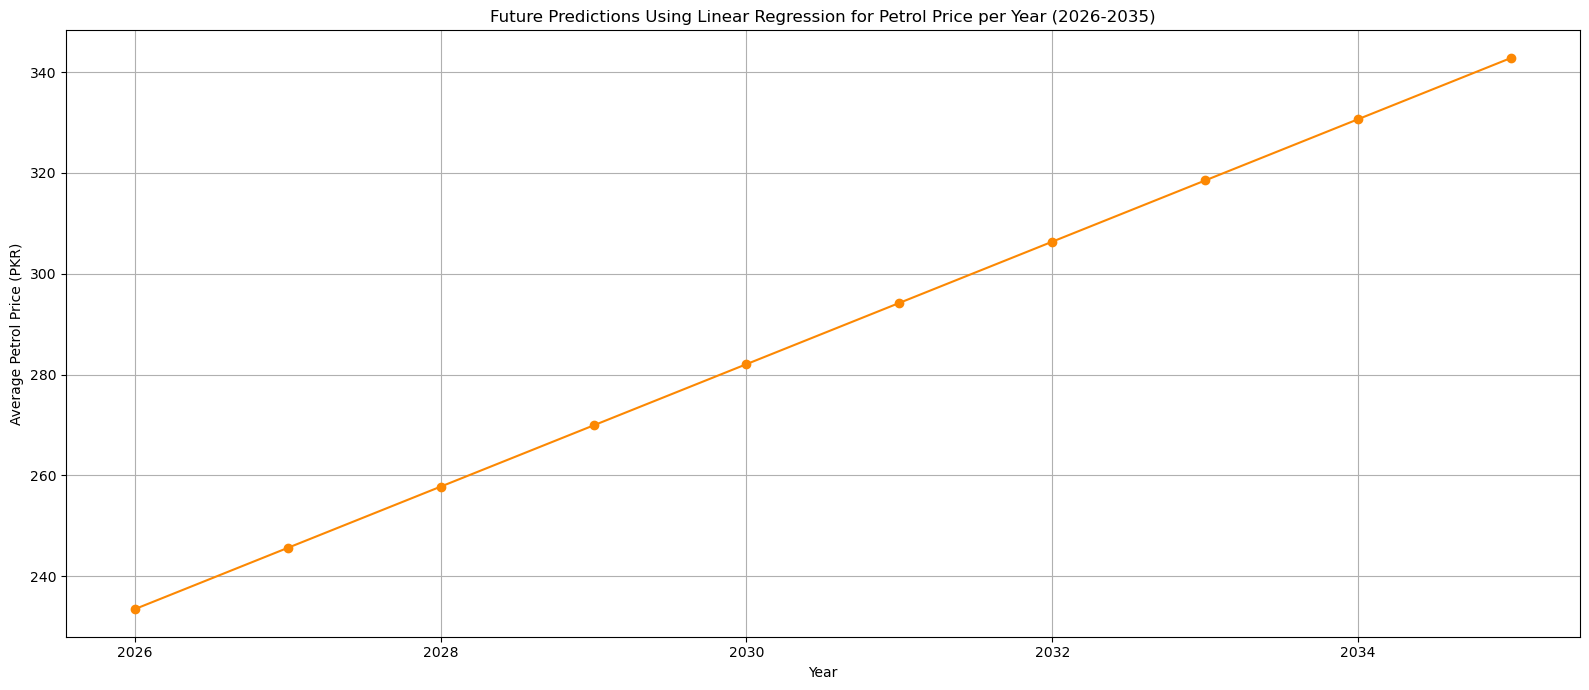

In [860]:
# Plotting
plt.figure(figsize=(16, 7))
plt.plot(result_df['Year'], result_df['Predicted Price'], marker='o', linestyle='-', color='#fc8803')

plt.title('Future Predictions Using Linear Regression for Petrol Price per Year (2026-2035)')
plt.xlabel('Year')
plt.ylabel('Average Petrol Price (PKR)')
plt.grid(True)
plt.tight_layout()

plt.show()

## **🔍 Why Some Models Predict the Same Value While Others Vary?**
In our regression problem, we tested different types of models:

### **✅ Tree-based Models**
RandomForestRegressor, GradientBoostingRegressor, XGBRegressor

**R² Score:** ~95%

**Prediction Output:** Same value for multiple future years (e.g., all years from 2026 to 2035 predicted as ~280.30)

### **🔁 K-Nearest Neighbors**
KNeighborsRegressor

**R² Score:** ~95%

**Prediction Output:** Slight variation in future values

### **➕ Linear Models**
LinearRegression, Lasso, Ridge

**R² Score:**~53%

**Prediction Output:** Linearly increasing values

## **💡 Logical Reason Behind These Differences**

### **1. Tree-Based Models (Flat Predictions)**

Tree-based models like Random Forest, Gradient Boosting, and XGBoost learn from splits in feature space. These models do not extrapolate beyond the range of the training data. When we ask them to predict for future years (e.g., 2026–2035) — which were not present during training — they tend to default to the average learned from the training set. Hence, they predict the same value repeatedly.

**Why same prediction?**
Because Year and Month values are outside the training range, and trees don’t extrapolate, they pick the most likely leaf (based on training) and return its average target value.

## **2. K-Nearest Neighbors (Slight Variance)**

KNN regressor finds the closest known data points (neighbors) and averages their target values. For unseen years, it finds nearby years (like 2025, 2024) and outputs an average, which can vary slightly depending on the neighbors.

**Why small changes?**
It’s not truly extrapolating but instead interpolating from past similar months/years, which may be slightly different.

### **3. Linear Models (Linearly Increasing Output)**

Linear models try to fit a straight line (or plane) to the data. They can extrapolate beyond the range of training data, which is why you see increasing or decreasing predictions for future years.

**Why low score?**
Real-world petrol prices may not follow a perfect linear trend, so while linear models extrapolate better, they fail to capture the complex patterns in the historical data, leading to lower accuracy (R² score).

## **Conclusion**
Tree-based models like Random Forest and XGBoost achieved high accuracy but predicted a constant value for future years. This is because tree-based models do not extrapolate well beyond the training data — they rely on learned splits and return average values from the closest training data.

Linear models, despite having lower accuracy, are better at extrapolating future trends, hence they produced linearly increasing predictions. However, they might oversimplify the pattern, leading to underfitting.

KNN lies in between — it doesn't truly extrapolate but gives varying predictions based on nearby known data.

➡️ **Takeaway:** When forecasting future values beyond training data, linear models may offer better directional insight, while tree-based models offer better fit within known data.